In [1]:
#Import libraries
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Setting the variables for my initial data
mean = .5
std = mean/6
datapoints = 20000

In [3]:
#Function to get a list with a gaussian distribution
def get_gaussian_dist(mean,std,datapoints):
    gauss_lst = []
    while len(gauss_lst) < datapoints:
        sample = random.gauss(mean, std)
        if sample >= 0 and sample <= 1:
            gauss_lst.append(sample)
    return gauss_lst    

#Function to calculate the multiplier for water based on 3 regions
def get_waterfall(datapoints):
    pop = [-.02,0,.02]
    wei = [3,3,3]    
    lst = []
    for points in range(datapoints):
        multi = random.choices(pop,wei,k=1)
        lst.append(multi[0])
    return(lst)

In [5]:
def make_dataframe(mean,std,datapoints,var):
    gauss_1 = get_gaussian_dist(mean,std,datapoints)
    gauss_2 = get_gaussian_dist(mean,std,datapoints)
    water = get_waterfall(datapoints)
    dict = {'Base_Gauss':gauss_1,'Sun_gauss':gauss_2,'Water_multi':water}
    df=pd.DataFrame(dict)
    df['plant_type'] = var
    return(df)

In [ ]:
plant_1 = make_dataframe(mean,std,datapoints,'plant_1')

In [7]:
plant_1.sample(5)

,Base_Gauss,Sun_gauss,Water_multi,plant_type
19078,0.559917,0.727164,0.02,plant_1
1066,0.513039,0.576531,-0.02,plant_1
9519,0.437351,0.556809,0.02,plant_1
1057,0.506574,0.549803,0.00,plant_1
1895,0.484484,0.465622,0.02,plant_1


In [30]:
gauss_1 = get_gaussian_dist(mean,std,datapoints)
gauss_2 = get_gaussian_dist(mean,std,datapoints)
water = get_waterfall(datapoints)

dict = {'Base_Gauss':gauss_1,'Sun_gauss':gauss_2,'Water_multi':water}
fake_iris=pd.DataFrame(dict)

In [ ]:
fake_iris.sample(5)

In [31]:
fake_iris['water_1_base'] = fake_iris['Water_multi'] + 1
fake_iris['water_2_base'] = fake_iris['Water_multi'] + 1
fake_iris['water_3_base'] = fake_iris['Water_multi'] + 1

In [32]:
fake_iris['plant_1_base'] = fake_iris['Base_Gauss'] + 9.9
fake_iris['plant_2_base'] = fake_iris['Base_Gauss'] + 10.1
fake_iris['plant_3_base'] = (fake_iris['Base_Gauss'] * 1.4) + 9.8

In [33]:
fake_iris['var_1'] = (fake_iris['plant_1_base'] + fake_iris['Sun_gauss']) * fake_iris['water_1_base']
fake_iris['var_2'] = (fake_iris['plant_2_base'] + fake_iris['Sun_gauss']) * fake_iris['water_2_base']
fake_iris['var_3'] = (fake_iris['plant_3_base'] + fake_iris['Sun_gauss']) * fake_iris['water_3_base']

In [ ]:
fake_iris.sample(5)

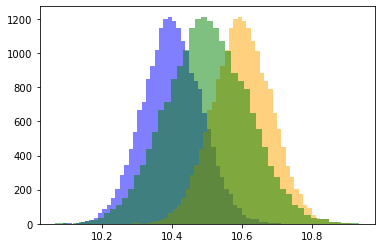

In [34]:
plt.hist(fake_iris['plant_1_base'], bins = 50, color='blue',alpha=.5);
plt.hist(fake_iris['plant_2_base'], bins = 50, color='orange',alpha=.5);
plt.hist(fake_iris['plant_3_base'], bins = 50, color='green',alpha=.5);

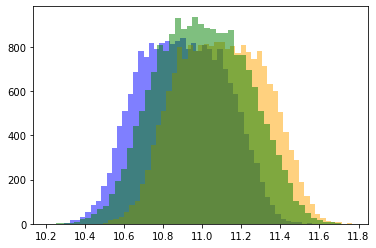

In [36]:
plt.hist(fake_iris['var_1'], bins = 50, color='blue',alpha=.5);
plt.hist(fake_iris['var_2'], bins = 50, color='orange',alpha=.5);
plt.hist(fake_iris['var_3'], bins = 50, color='green',alpha=.5);